# Preprocessing
Document -> vector representation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, re

import textract
import nltk
nltk.download("punkt", download_dir="nltk/")
nltk.data.path.append("nltk/")
from nltk.corpus import stopwords

%matplotlib inline

[nltk_data] Downloading package punkt to nltk/...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
folder_path = "data/"
titles = []
corpus = []

for topic in os.listdir(folder_path):
    topic_path = os.path.join(folder_path, topic)
    for doc in os.listdir(topic_path):
        doc_path = os.path.join(topic_path, doc)
        try:
            doc_text = textract.process(doc_path)
            doc_text = doc_text.replace("\n", " ")
            doc_text = re.sub(r"\b[0-9][0-9.,-]*\b", "UNIFIED-NUMBER-TOKEN", doc_text) # TBD, replace numbers 
            corpus.append(doc_text)
            titles.append(doc_path)
        except UnicodeDecodeError as e:
            print("Unable to read-in", doc_path, "(Decoding error)")


('Unable to read-in', 'data/ai/1804.09856.pdf', '(Decoding error)')
('Unable to read-in', 'data/ai/1804.09817.pdf', '(Decoding error)')
('Unable to read-in', 'data/economy/1804.05974.pdf', '(Decoding error)')


In [3]:
len(corpus)

6

In [4]:
arxiv_stopwords = ["arxiv",
                   "astro-ph", "astro-ph.co", "astro-ph.ep", "astro-ph.ga", "astro-ph.he", "astro-ph.im", "astro-ph.sr",
                   "cond-mat.dis-nn", "cond-mat.mes-hall", "cond-mat.mtrl-sci", "cond-mat.other", "cond-mat.quant-gas", "cond-mat.soft", "cond-mat.stat-mech", "cond-mat.str-el", "cond-mat.supr-con",
                   "cs.ai", "cs.ar", "cs.CC", "cs.ce", "cs.cg", "cs.cl", "cs.cr", "cs.cv", "cs.cy", "cs.db", "cs.dc", "cs.dl", "cs.dm", "cs.ds", "cs.et", "cs.fl", "cs.gl", "cs.gr", "cs.gt", "cs.hc", "cs.ir", "cs.it", "cs.lg", "cs.lo", "cs.ma","cs.mm", "cs.ms", "cs.na", "cs.ne", "cs.ni", "cs.oh", "cs.os", "cs.pf", "cs.pl", "cs.ro", "cs.sc", "cs.sd", "cs.se", "cs.si", "cs.sy", "econ.em",
                   "eess.as", "eess.iv", "eess.sp",
                   "gr-qc",
                   "hep-ex", "hep-lat", "hep-ph", "hep-th",
                   "math.ac", "math.ag", "math.ap","math.at", "math.ca", "math.co", "math.ct", "math.cv", "math.dg", "math.ds", "math.fa", "math.gm", "math.gn", "math.gr", "math.gt", "math.ho", "math.it", "math.kt", "math.lo", "math.mg", "math.mp", "math.na", "math.nt", "math.oa", "math.oc", "math.pr", "math.qa", "math.ra", "math.rt", "math.sg", "math.sp", "math.st", "math-ph",
                   "nlin.ao", "nlin.cd", "nlin.cg", "nlin.ps", "nlin.si",
                   "nucl-ex", "nucl-th", 
                   "physics.acc-ph", "physics.ao-ph", "physics.app-ph", "physics.atm-clus", "physics.atom-ph", "physics.bio-ph", "physics.chem-ph", "physics.class-ph", "physics.comp-ph", "physics.data-an", "physics.ed-ph", "physics.flu-dyn", "physics.gen-ph", "physics.geo-ph", "physics.hist-ph", "physics.ins-det", "physics.med-ph", "physics.optics", "physics.plasm-ph", "physics.pop-ph", "physics.soc-ph", "physics.space-ph",
                   "q-bio.bm", "q-bio.cb","q-bio.gn", "q-bio.mn", "q-bio.nc", "q-bio.ot", "q-bio.pe", "q-bio.qm", "q-bio.sc", "q-bio.to", "q-fin.cp", "q-fin.ec", "q-fin.gn", "q-fin.mf", "q-fin.PM", "q-fin.PR", "q-fin.RM", "q-fin.ST", "q-fin.tr",
                   "quant-ph",
                   "stat.ap", "stat.co", "stat.me", "stat.ml", "stat.ot", "stat.th"]

## Vectorization

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        if item not in arxiv_stopwords:
            stems.append(PorterStemmer().stem(item))
    return stems

tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words="english", strip_accents="unicode")
feature_matrix = tfidf.fit_transform(corpus)

In [6]:
print("Tokens:", len(tfidf.vocabulary_))
tfidf.vocabulary_

('Tokens:', 4541)


{u'quebec': 3110,
 u'yellow': 4378,
 u'secondli': 3437,
 u'dot-com': 1180,
 u'asian': 332,
 u'payoff': 2844,
 u'accur': 137,
 u'martonosi': 2395,
 u'swap': 3793,
 u'digit': 1110,
 u'metapath': 2459,
 u'dell': 1040,
 u'vase': 4175,
 u'govern': 1648,
 u'affect': 176,
 u'prize': 3020,
 u'popolazion': 2952,
 u'vector': 4177,
 u'elgar': 1268,
 u'bevan': 487,
 u'corpora': 900,
 u'graph-bas': 1661,
 u'esop': 1347,
 u'unified-number-token4p1': 4069,
 u'10m': 58,
 u'miller': 2486,
 u'second': 3435,
 u'aggreg': 187,
 u'mean-valu': 2419,
 u'dialogu': 1096,
 u'e+': 1218,
 u'neg': 2599,
 u'asid': 333,
 u'cheng': 683,
 u'plodder': 2929,
 u'new': 2612,
 u'net': 2605,
 u'hectar': 1737,
 u'med': 2424,
 u'elimin': 1269,
 u'intellectu': 1969,
 u'abov': 117,
 u'men': 2444,
 u'mei': 2435,
 u'restat': 3270,
 u'met': 2458,
 u'interpret': 1983,
 u'militari': 2485,
 u'k': 2096,
 u'saless': 3378,
 u'jame': 2045,
 u'loop': 2298,
 u'\xab': 4443,
 u'controversi': 878,
 u'|a|': 4418,
 u'`1q': 98,
 u'volunt': 4221,


In [7]:
feature_matrix.toarray()

array([[0.00197374, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00588969, 0.00588969,
        0.00588969],
       [0.        , 0.        , 0.00783341, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00555185, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Similarity

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

cos_similarities = cosine_similarity(feature_matrix)
# or (feature_matrix * feature_matrix.T).toarray()

cos_similarities

array([[1.        , 0.84445544, 0.78472009, 0.76161622, 0.77314211,
        0.85456306],
       [0.84445544, 1.        , 0.74979422, 0.71916919, 0.72444037,
        0.79601281],
       [0.78472009, 0.74979422, 1.        , 0.75041216, 0.71317886,
        0.77721656],
       [0.76161622, 0.71916919, 0.75041216, 1.        , 0.70119415,
        0.76202687],
       [0.77314211, 0.72444037, 0.71317886, 0.70119415, 1.        ,
        0.79227226],
       [0.85456306, 0.79601281, 0.77721656, 0.76202687, 0.79227226,
        1.        ]])

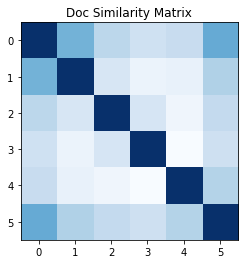

In [9]:
plt.imshow(cos_similarities, cmap="Blues")
plt.title("Doc Similarity Matrix")
plt.show()

# Clustering

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=23).fit(feature_matrix)

Confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = kmeans.labels_
y_true = np.array([1, 1, 0, 0, 2, 2]) # true labels: [Sociology, Sociology, AI, AI, Economy, Economy]
labels = ["Sociology", "AI", "Economy"]

print(confusion_matrix(y_true, y_pred))

[[2 0 0]
 [0 2 0]
 [0 1 1]]


Classification report

In [12]:
print(classification_report(y_true, y_pred, target_names=labels))

             precision    recall  f1-score   support

  Sociology       1.00      1.00      1.00         2
         AI       0.67      1.00      0.80         2
    Economy       1.00      0.50      0.67         2

avg / total       0.89      0.83      0.82         6

